In [1]:
import sys
import numpy as np
import pandas as pd
import seaborn as sns

sys.path.append('../..')

from tqdm import tqdm
from sklearn.decomposition import FactorAnalysis
from src.analyzer.corpus_statistics import calculate_corpus_statistics
from src.analyzer.calculate_dimensions import calculate_dimensions

In [2]:
samples_df = pd.read_csv('../../data/1k_samples_per_dataset.tsv', sep='\t', lineterminator='\n')
samples_df = samples_df.sample(frac=1).reset_index(drop=True)
samples_df.head()

,documentID,authorID,text,source,dataset
0,fe9f31f8-8b05-43ac-a689-f223d27cd52e,AQUU8S55JGY2H,What The Trial lacks in comprehension (purpose...,amazon,Amazon
1,9b244f87-51a0-59c7-a13c-3be3a0fc6a19,52e43081-58d7-8abe-f41c-a2c2e4db7097,tr0221christie 10 KURDZUK.JPG\nA Middletown po...,nj.com,News
2,cmtlp0m,766dfe84-dae8-e013-b57d-2b4cc532076d,As an australian i was quite surprised at how ...,subreddit-TwoXChromosomes,Reddit
3,187603353,6309556.0,"Delaware's main league, the Delaware Scholasti...",wiki,Wiki
4,270563813,5641591.0,Colloidal transport in porous media The questi...,wiki,Wiki


In [16]:
dim_rows = []
i = 0

for row in tqdm(samples_df.itertuples(), total=len(samples_df)):
    corpus_stats = calculate_corpus_statistics(row.text, 
                                      token_batch_size=2000, 
                                      token_normalization=100, 
                                      show_progress=False, use_gpu=False)
    dimensions = calculate_dimensions(corpus_stats)
    dimensions['author'] = row.authorID
    dimensions['dataset'] = row.dataset
    
    dim_rows.append(dimensions)
    i += 1
    if i == 1000:
        break
    
dim_df = pd.DataFrame(dim_rows)
dim_df.head()

 17%|██████████████████████████████████▉                                                                                                                                                                               | 999/6000 [05:28<27:24,  3.04it/s]


,1,2,3,4,5,6,author,dataset
0,10.543596,-7.248454,2.280966,-8.765124,-2.670088,-3.314122,AQUU8S55JGY2H,Amazon
1,10.059491,-5.222700,1.584616,-8.513468,-2.373329,-3.363592,52e43081-58d7-8abe-f41c-a2c2e4db7097,News
2,10.185978,-7.119931,2.117917,-9.153395,-1.676906,-3.495074,766dfe84-dae8-e013-b57d-2b4cc532076d,Reddit
3,9.926020,-6.814032,2.528302,-9.115703,-1.872013,-3.415709,6309556.0,Wiki
4,9.184673,-7.017368,1.604767,-9.206371,-1.386046,-3.495074,5641591.0,Wiki


In [17]:
dim_df.to_csv('author_dimensions.csv', index=False)

<Axes: xlabel='3', ylabel='1'>

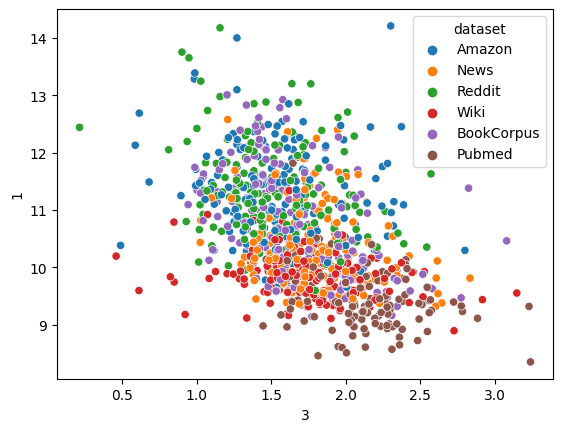

In [40]:
sns.scatterplot(data=dim_df, x="3", y="1", hue="dataset")

In [34]:
dim_avgs = dim_df.groupby(['dataset']).mean().reset_index()
dim_avgs.head()

/var/folders/6y/4xz13f9n0n18x94nx555hjpw0000gr/T/ipykernel_25922/523257542.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dim_avgs = dim_df.groupby(['dataset']).mean().reset_index()


,dataset,1,2,3,4,5,6
0,Amazon,11.318866,-6.741146,1.539953,-8.670416,-3.014171,-3.260589
1,BookCorpus,10.750299,-6.157149,1.681760,-8.637668,-2.594661,-3.298767
2,News,10.308250,-6.472362,1.786481,-8.641014,-2.434788,-3.295782
3,Pubmed,9.464260,-6.690079,2.078410,-8.768354,-1.900004,-3.252849
4,Reddit,11.325587,-6.849137,1.517522,-8.622833,-3.154403,-3.355178


<Axes: xlabel='1', ylabel='3'>

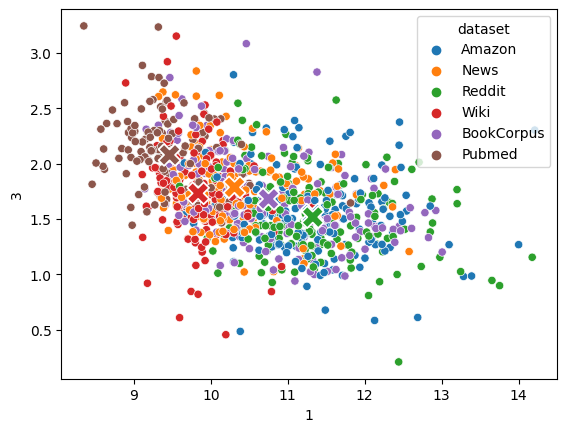

In [71]:
dims = ("1", "3")
hue_order = ['Amazon', 'News', 'Reddit', 'Wiki', 'BookCorpus', 'Pubmed']

sns.scatterplot(data=dim_df, x=dims[0], y=dims[1], hue="dataset", hue_order=hue_order)
sns.scatterplot(data=dim_avgs, x=dims[0], y=dims[1], s=250, hue="dataset", legend=False, hue_order=hue_order, marker='X')